In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [176]:
df = pd.read_csv('weather_today.csv')
df

,小时,温度,风力方向,风级,降水量,相对湿度,空气质量
0,7,28.0,东北风,3,0.0,86,NaN
1,6,27.0,东北风,4,0.0,92,14.0
2,5,26.9,东北风,3,0.0,93,13.0
3,4,26.7,东北风,3,1.7,95,13.0
4,3,27.2,东北风,3,0.2,91,12.0
5,2,27.6,东北风,3,0.1,89,13.0
6,1,28.5,东北风,3,0.0,82,14.0
7,0,28.8,东北风,2,0.0,81,13.0
8,23,28.9,东北风,3,0.0,78,11.0
9,22,28.8,东风,3,0.0,81,12.0


In [ ]:
def wind_rader(data):
    """风向雷达图"""
    wind = list(data['风力方向'])
    wind_speed = list(data['风级'])
    for i in range(0,24):
        if wind[i] == '北风':
            wind[i] = 90
        elif wind[i] == '南风':
            wind[i] = 270
        elif wind[i] == '西风':
            wind[i] = 180
        elif wind[i] == '东风':
            wind[i] = 360
        elif wind[i] == '东北风':
            wind[i] = 45
        elif wind[i] == '西北风':
            wind[i] = 135
        elif wind[i] == '西南风':
            wind[i] = 225
        elif wind[i] == '东南风':
            wind[i] = 315
    degs = np.arange(45,361,45)
    temp = []
    for deg in degs:
        speed = []
        # 获取 wind_deg 在指定范围的风速平均值数据
        for i in range(0,24):
            if wind[i] == deg:
                speed.append(wind_speed[i])
        if len(speed) == 0:
            temp.append(0)
        else:
            temp.append(sum(speed)/len(speed))
    print(temp)
    N = 8
    theta = np.linspace(0. +np.pi/8 , 2 * np.pi + np.pi/8, N  )
    # 数据极径
    radii = np.array(temp)
    # 绘制极区图坐标系
    plt.axes(polar=True)
    # 定义每个扇区的RGB值（R,G,B）,x 越大，对应的颜色越接近蓝色
    colors = [(1-x/max(radii), 1-x/max(radii), 0.6) for x in radii]
    plt.bar(theta, radii, width=(2*np.pi/N), bottom=0.0, color=colors)
    plt.title('一天风级图',x=0.2,fontsize=20)
    plt.show(
)

In [178]:
def calc_corr(a,b):
    """计算相关系数"""
    a_avg = sum(a)/len(a)
    b_avg = sum(b)/len(b)
    cov_ab = sum([(x - a_avg) * (y - b_avg) for x,y in zip(a,b)])
    sq = math.sqrt(sum([(x - a_avg) ** 2 for x in a]) * sum([(x - b_avg) ** 2 for x in b]))
    corr_factor = cov_ab / sq
    return corr_factor

In [179]:
def corr_tem_hum(data):
    """温湿度相关性分析"""
    tem = data['温度']
    hum = data['相对湿度']
    plt.scatter(tem, hum, color='blue')
    plt.xlabel('温湿度相关性分析图')
    plt.ylabel('温度/℃')
    plt.title('相对湿度/%')
    plt.text(20,40,'相关性系数:' + str(calc_corr(tem, hum)),fontdict={'size':10,'color':'red'})
    plt.show()
    print('相关性系数:',calc_corr(tem, hum))

In [180]:
def tem_curve(data):
    """绘制温度曲线"""
    # 假设数据中有 '最高气温' 和 '日期' 列
    if '最高气温' in data.columns and '日期' in data.columns:
        # 先将最高气温列转换为字符串类型，再去除 '℃' 符号并转换为数值类型
        data['最高气温'] = data['最高气温'].astype(str).str.replace('℃', '').astype(float)
        plt.figure(figsize=(10, 6))
        plt.plot(data['日期'], data['最高气温'], label='最高气温')
        plt.xlabel('日期')
        plt.ylabel('温度 (℃)')
        plt.title('最高气温曲线')
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

In [181]:
def hum_curve(data):
    """绘制湿度曲线"""
    # 检查数据中是否包含 '湿度' 和 '日期' 列
    if '湿度' in data.columns and '日期' in data.columns:
        # 假设湿度数据是类似 '60%' 格式，去除 '%' 符号并转换为数值类型
        if data['湿度'].dtype == object:
            data['湿度'] = data['湿度'].str.replace('%', '').astype(float)
        plt.figure(figsize=(10, 6))
        plt.plot(data['日期'], data['湿度'], label='湿度')
        plt.xlabel('日期')
        plt.ylabel('湿度 (%)')
        plt.title('湿度曲线')
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print("数据中缺少 '湿度' 或 '日期' 列，无法绘制湿度曲线。")

In [182]:
def air_curve(data):
    """绘制空气质量指数曲线"""
    # 检查数据中是否包含 '空气质量指数' 和 '日期' 列
    if '空气质量指数' in data.columns and '日期' in data.columns:
        plt.figure(figsize=(10, 6))
        plt.plot(data['日期'], data['空气质量指数'], label='空气质量指数')
        plt.xlabel('日期')
        plt.ylabel('空气质量指数')
        plt.title('空气质量指数曲线')
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print("数据中缺少 '空气质量指数' 或 '日期' 列，无法绘制空气质量指数曲线。")

In [183]:
def main():
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
    plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
    data1 = pd.read_csv('weather_today.csv')
    print(data1)
    tem_curve(data1)
    hum_curve(data1)
    air_curve(data1)
    wind_rader(data1)
    corr_tem_hum(data1)

    小时    温度 风力方向  风级  降水量  相对湿度  空气质量
0    7  28.0  东北风   3  0.0    86   NaN
1    6  27.0  东北风   4  0.0    92  14.0
2    5  26.9  东北风   3  0.0    93  13.0
3    4  26.7  东北风   3  1.7    95  13.0
4    3  27.2  东北风   3  0.2    91  12.0
5    2  27.6  东北风   3  0.1    89  13.0
6    1  28.5  东北风   3  0.0    82  14.0
7    0  28.8  东北风   2  0.0    81  13.0
8   23  28.9  东北风   3  0.0    78  11.0
9   22  28.8   东风   3  0.0    81  12.0
10  21  28.9  东北风   3  0.0    83  14.0
11  20  29.0   东风   4  0.0    82  16.0
12  19  28.9  东北风   2  0.0    82  15.0
13  18  29.4   东风   3  0.0    80  15.0
14  17  28.9   东风   3  0.0    84  15.0
15  16  29.4  东北风   3  0.0    83  15.0
16  15  28.9  东北风   4  0.2    85  15.0
17  14  31.3   东风   3  0.0    76  14.0
18  13  30.9   东风   3  0.0    79  14.0
19  12  32.4   东风   4  0.0    72  14.0
20  11  31.9   东风   3  0.0    75  15.0
21  10  31.4   东风   3  0.0    76  14.0
22   9  31.4  东北风   3  0.0    75  14.0
23   8  30.3  东北风   3  0.0    80  14.0
数据中缺少 '湿度' 或 '日期' 列，无法绘制湿

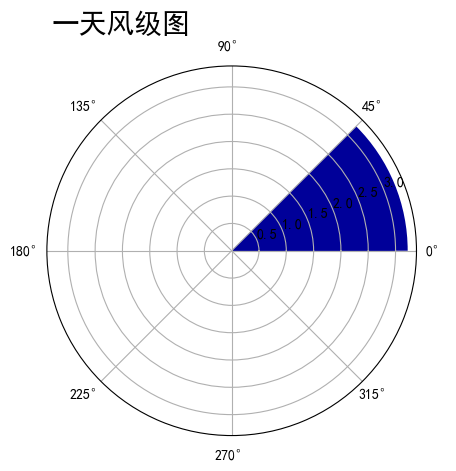

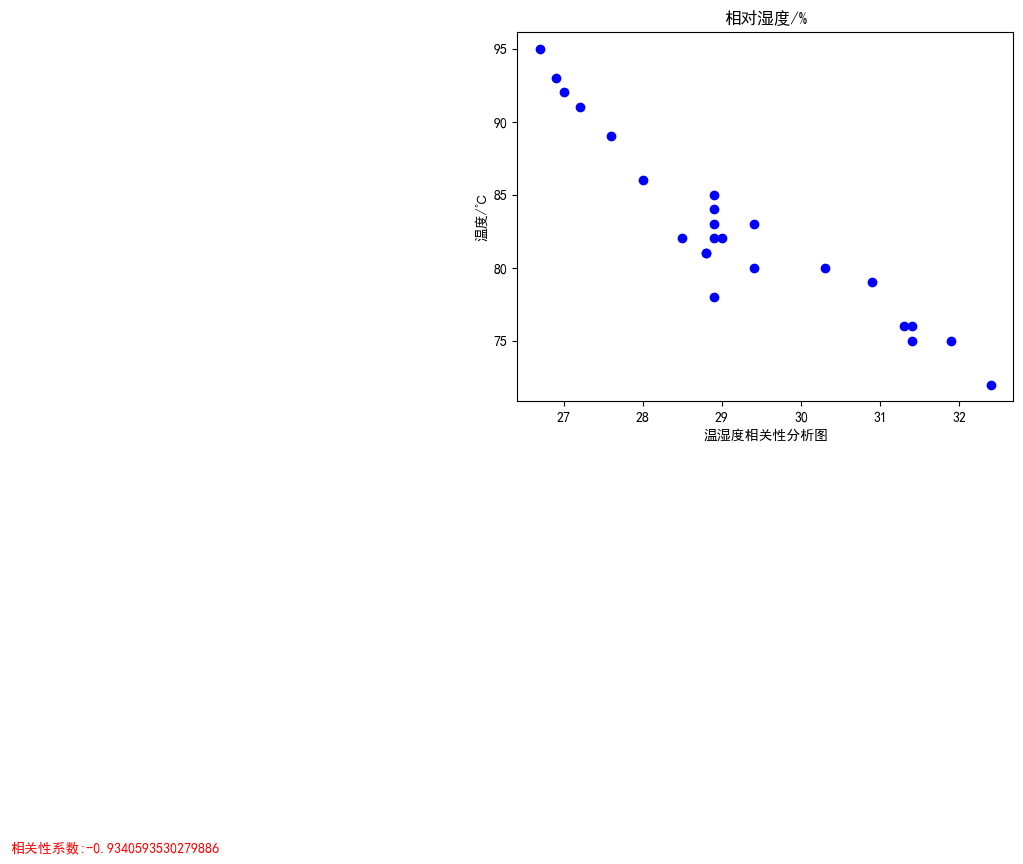

相关性系数: -0.9340593530279886


In [184]:

if __name__ == '__main__':
    main()